# 🧪 Respostas da Prova Técnica

Este notebook deve conter as suas respostas para a prova técnica da vaga de Analista de Dados Júnior da ATMO ENERGIA.

## 1. Leitura e entendimento dos dados

In [1]:
# Carregue aqui os arquivos `vazoes.csv` e `posto.csv` com pandas

# Importando biblioteca
import pandas as pd

# Carregando os arquivos CSV
vazoes = pd.read_csv('./{}/respostas/vazoes.csv', sep=';', decimal=',')
posto = pd.read_csv('./respostas/posto.csv', sep=';', decimal=',')

FileNotFoundError: [Errno 2] No such file or directory: 'vazoes.csv'

In [ ]:
# Exiba as primeiras linhas dos datasets

# Exibindo as primeiras 5 linhas de cada arquivo
print("Primeiras 5 linas de 'vazoes.csv':\n", vazoes.head())
print("\nPrimeiras 5 linas de 'posto.csv':\n",posto.head())

Primeiras 5 linas de 'vazoes.csv':
    posto        data   vazao
0      1  2025-02-03  280.95
1      1  2025-02-04  273.48
2      1  2025-02-05  263.71
3      1  2025-02-06  240.05
4      1  2025-02-07  208.74

Primeiras 5 linas de 'posto.csv':
    posto  produtibilidade submercado   bacia
0      1           0.2076         se  grande
1      2           0.2437         se  grande
2      6           0.8130         se  grande
3      7           0.3471         se  grande
4      8           0.5437         se  grande


**Comentário:** Descreva brevemente o que você entendeu sobre os dados.

O arquivo 'vazoes.csv' contém três colunas: a numeração dos postos de medição, a data da medição e a respectiva vazão registrada em cada posto. Já o arquivo 'posto.csv' contém quatro colunas: a numeração do posto, sua produtividade, a localização em termos de submercado (Sul, Sudeste, Norte ou Nordeste) e a bacia hidrográfica à qual o posto pertence dentro do Sistema Interligado Nacional.

Os arquivos se relacionam entre si, visto que 'vazoes.csv' contém os valores diários de vazão medidos entre 02/02/2025 e 24/03/2025 para cada um dos postos listados em 'posto.csv'.

Com base no exposto, recomenda-se o uso do arquivo 'posto.csv' como arquivo de cadastro ou dimensão, pois ele reúne informações de referência sobre cada posto, como numeração, produtividade e localização. Já o arquivo 'vazoes.csv' é indicado por conter os valores de vazão medidos diariamente no período de 02/02/2025 a 24/03/2025, correspondentes aos postos listados no arquivo de referência 'posto.csv'.

## 2. Limpeza e pré-processamento

In [ ]:
# Verifique valores nulos e tipos de dados

# Corrigindo os tipos de vazões
vazoes['data'] = pd.to_datetime(vazoes['data'], errors='coerce')
vazoes['vazao'] = pd.to_numeric(vazoes['vazao'], errors='coerce')

# Verificando valores nulos em ambos os arquivos
print("Valores nulos em 'vazoes.csv':")
print(vazoes.isnull().sum())
print("\nValores nulos em 'posto.csv':")
print(posto.isnull().sum())

# Verificando valores de vazão negativos
print("\nValores de vazão negativos em 'vazoes.csv':", (vazoes['vazao'] < 0).sum())

Valores nulos em 'vazoes.csv':
posto     0
data      0
vazao    39
dtype: int64

Valores nulos em 'posto.csv':
posto              0
produtibilidade    0
submercado         0
bacia              0
dtype: int64

Valores de vazão negativos em 'vazoes.csv': 5


In [ ]:
# Trate valores ausentes ou inconsistentes e comente suas decisões

# Preenchendo os valores ausentes em 'vazoes.csv' por meio de interpolação linear
vazoes['vazao'] = vazoes['vazao'].interpolate(method='linear')

# Convertendo  os valores da coluna 'produtibilidade' para float em 'posto.csv'
posto['produtibilidade'] = pd.to_numeric(posto['produtibilidade'], errors='coerce')

# Removendo os valores negativos em 'vazoes.csv'
vazoes = vazoes[vazoes['vazao'] >= 0]

**Comentário:** Explique quais tratamentos foram feitos e o motivo.

No arquivo 'vazoes.csv', os valores ausentes foram substituídos por valores obtidos através da interpolação linear simples, já que essa técnica é adequada quando há poucos dados ausentes. Além disso, os valores negativos presentes na coluna 'vazao' foram removidos, visto que não existe vazão negativa.

No arquivo 'posto.csv', os valores inválidos (como letras ou caracteres errados) da coluna 'produtibilidade' tornaram-se NaN (valores ausentes).

## 3. Análise Estatística Descritiva

In [ ]:
# Calcule estatísticas como média, mediana, desvio-padrão, etc.

# Calculando as estatísticas da coluna 'vazao' utilizando o 'describe'
estatisticas_vazao = vazoes['vazao'].describe(percentiles=[.01, .25, .5, .75, .99])
print("Estatísticas descritivas dos dados de vazão:")
print(estatisticas_vazao)
print("\nDesvio padrão dos dados de vazão:", vazoes['vazao'].std()) # cálculo do desvio padrão

Estatísticas descritivas dos dados de vazão:
count    12195.000000
mean      1277.354726
std       3973.770953
min          0.000000
1%           0.000000
25%         29.700000
50%        190.810000
75%        743.095000
99%      23253.893400
max      40820.450000
Name: vazao, dtype: float64

Desvio padrão dos dados de vazão: 3973.7709529114863


In [ ]:
# Explore possíveis correlações

# Agrupando os DataFrames de 'vazoes.csv' e 'posto.csv' para melhor comparação
dados = pd.merge(vazoes, posto, on='posto', how='left')

# Calculando a vazão média por bacia
media_bacia = dados.groupby('bacia')['vazao'].mean().sort_values(ascending=False)
print("Vazão média por bacia:")
print(media_bacia.head())

# Calculando a vazão média por submercado
media_submercado = dados.groupby('submercado')['vazao'].mean().sort_values(ascending=False)
print("\nVazão média por submercado:")
print(media_submercado)

# Criando uma tabela com os dados para descobrir a correlação entre vazão de diferentes postos
pivot = dados.pivot_table(index='data', columns='posto', values='vazao')
correlacoes = pivot.corr()
print("\nMatriz de correlação entre postos:")
print(correlacoes)

Vazão média por bacia:
bacia
xingu           12143.693333
amazonas         4913.036223
alto-parana      3834.373314
tocantins        3797.973580
baixo-parana     3348.261790
Name: vazao, dtype: float64

Vazão média por submercado:
submercado
n     4066.671990
ne    1423.721575
se    1211.285989
s      221.363720
Name: vazao, dtype: float64

Matriz de correlação entre postos:
posto     1         2         6         7         8         9         \
posto                                                                  
1         1.000000  1.000000  0.891280  0.855107  0.839402  0.827018   
2         1.000000  1.000000  0.891280  0.855107  0.839402  0.827018   
6         0.891280  0.891280  1.000000  0.993554  0.988112  0.983240   
7         0.855107  0.855107  0.993554  1.000000  0.999097  0.997359   
8         0.839402  0.839402  0.988112  0.999097  1.000000  0.999539   
...            ...       ...       ...       ...       ...       ...   
64617000  0.430407  0.430407  0.566330  0.5654

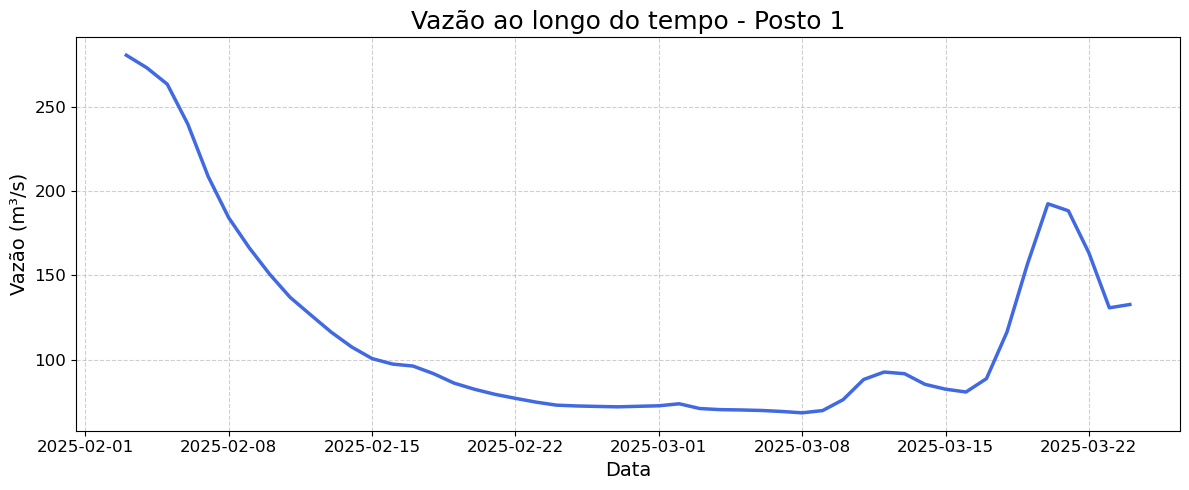

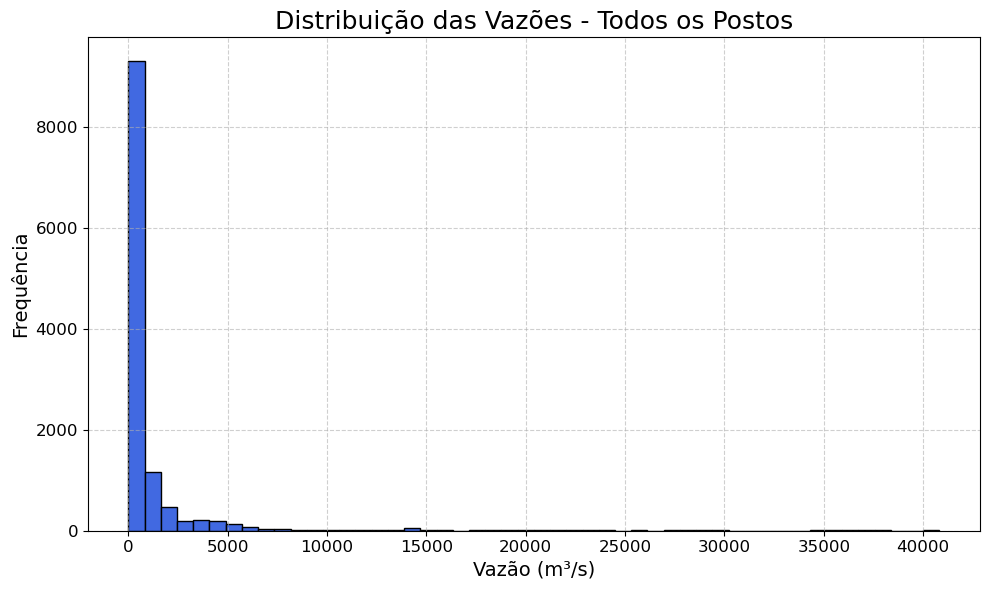

In [ ]:
# Crie pelo menos dois gráficos que ajudem a entender o comportamento das vazões

# Gráfico de sério temporal da vazão para um posto específico (no caso, o posto 1)

# Importando biblioteca
import matplotlib.pyplot as plt

# Selecionando o posto 1 (é variável)
posto_escolhido = vazoes['posto'].unique()[0]
dados_posto = vazoes[vazoes['posto'] == posto_escolhido]

# Plotando a série temporal em um gráfico
plt.figure(figsize=(12, 5))
plt.plot(dados_posto['data'], dados_posto['vazao'], color='royalblue', linewidth=2.5)
plt.title(f'Vazão ao longo do tempo - Posto {posto_escolhido}', fontsize=18)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vazão (m³/s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Histograma geral para as vazões de todos os postos

# Juntando os dados de vazões com dados do posto
vazoes['posto'] = vazoes['posto'].astype(int)
posto['posto'] = posto['posto'].astype(int)
dados = pd.merge(vazoes, posto, on='posto', how='left')

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.hist(vazoes['vazao'].dropna(), bins=50, color='royalblue', edgecolor='black')
plt.title('Distribuição das Vazões - Todos os Postos', fontsize=18)
plt.xlabel('Vazão (m³/s)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Comentário:** Interprete os resultados obtidos.

O cálculo de energia ao longo do tempo e espaço (ano, mês, estação do ano, submercado e bacia hidrográfica) permite observar a distribuição temporal e espacial da geração de energia, permitindo entender a sazonalidade e a importância regional da produção de energia.

O cálculo da vazão média por bacia pode revelar a importância da extensão territorial e volume hídrico de cada região de interesse. Já os resultados obtidos pela vazão média por submercado reforça a importância hídrica de cada uma das regiões para o sistema interligado nacional. 

Com relação ao gráfico gerado, é possível avaliar o comportamento da vazão ao longo dos dias, pondendo identificar eventuais eventos de chuva extrema ou seca prolongada. O histograma se torna uma ferramenta complementar, visto que fornece informações da quantidade de eventos por vazão medida.

## 4. Análise Exploratória e Estimativa de Energia

In [ ]:
# Realize agrupamentos temporais e por atributos como submercado ou bacia

# Agrupando os dados de vazão média por mês
media_mensal = vazoes.groupby(vazoes['data'].dt.month)['vazao'].mean()
print("Média mensal de vazão:")
print(media_mensal)

# Agrupando os dados de vazão média por ano
media_anual = vazoes.groupby(vazoes['data'].dt.year)['vazao'].mean()
print("\nMédia anual de vazão:")
print(media_anual)

# Agrupando os dados de vazão média por estação do ano
def estacao_do_ano(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'
vazoes['estacao'] = vazoes['data'].dt.month.apply(estacao_do_ano)
media_estacao = vazoes.groupby('estacao')['vazao'].mean()
print("\nMédia de vazão por estação do ano:")
print(media_estacao)

# Agrupando os dados de vazão média por submercado
dados_completos = vazoes.merge(posto, on='posto')
media_submercado = dados_completos.groupby('submercado')['vazao'].mean()
print("\nMédia de vazão por submercado:")
print(media_submercado)

# Agrupando os dados de vazão média por bacia hidroggráfica
media_bacia = dados_completos.groupby('bacia')['vazao'].mean()
print("\nMédia de vazão por bacia hidrográfica:")
print(media_bacia.head())

Média mensal de vazão:
data
2    1437.606392
3    1103.714531
Name: vazao, dtype: float64

Média anual de vazão:
data
2025    1277.354726
Name: vazao, dtype: float64

Média de vazão por estação do ano:
estacao
Outono    1103.714531
Verão     1437.606392
Name: vazao, dtype: float64

Média de vazão por submercado:
submercado
n     4066.671990
ne    1423.721575
s      221.363720
se    1211.285989
Name: vazao, dtype: float64

Média de vazão por bacia hidrográfica:
bacia
alto-parana     3834.373314
alto-tiete        34.849312
amazonas        4913.036223
araguari        1394.156333
baixo-parana    3348.261790
Name: vazao, dtype: float64


In [ ]:
# Estime a energia (MW) com base na vazão e na produtibilidade dos postos

# Unindo os dados de vazão com os dados do posto e calculando a energia para cada registro
dados_completos = vazoes.merge(posto, on='posto')
dados_completos['energia_MW'] = dados_completos['vazao'] * dados_completos['produtibilidade']
print(dados_completos[['posto', 'data', 'vazao', 'produtibilidade', 'energia_MW']].head())

# Calculando a energia por posto
energia_por_posto = dados_completos.groupby('posto')['energia_MW'].sum().reset_index()
print("\nEnergia total por posto:")
print(energia_por_posto.head())

# Calculando a energia por bacia
energia_por_bacia = dados_completos.groupby('bacia')['energia_MW'].sum().reset_index()
print("\nEnergia total por bacia:")
print(energia_por_bacia.head())

# Calculando a energia por submercado
energia_por_submercado = dados_completos.groupby('submercado')['energia_MW'].sum().reset_index()
print("\nEnergia total por submercado:")
print(energia_por_submercado)

   posto       data   vazao  produtibilidade  energia_MW
0      1 2025-02-03  280.95           0.2076   58.325220
1      1 2025-02-04  273.48           0.2076   56.774448
2      1 2025-02-05  263.71           0.2076   54.746196
3      1 2025-02-06  240.05           0.2076   49.834380
4      1 2025-02-07  208.74           0.2076   43.334424

Energia total por posto:
   posto    energia_MW
0      1   1204.590696
1      2   1414.059502
2      6  36184.833270
3      7  17494.922952
4      8  28149.099714

Energia total por bacia:
          bacia     energia_MW
0   alto-parana  177095.292600
1    alto-tiete   18784.758168
2      amazonas  821834.049339
3      araguari   32762.008606
4  baixo-parana  600387.368752

Energia total por submercado:
  submercado    energia_MW
0          n  1.306698e+06
1         ne  4.095047e+05
2          s  2.668798e+05
3         se  2.525955e+06


Energia por ano:
    ano    energia_MW
0  2025  4.509037e+06

Energia por mês:
   mes    energia_MW
0    2  2.706049e+06
1    3  1.802988e+06

Energia por estação do ano:
  estacao    energia_MW
0  Outono  1.802988e+06
1   Verão  2.706049e+06

Energia por submercado:
  submercado    energia_MW
0          n  1.306698e+06
1         ne  4.095047e+05
2          s  2.668798e+05
3         se  2.525955e+06

Energia por bacia hidrográfica:
          bacia     energia_MW
0   alto-parana  177095.292600
1    alto-tiete   18784.758168
2      amazonas  821834.049339
3      araguari   32762.008606
4  baixo-parana  600387.368752


C:\Users\estella.jesus\AppData\Local\Temp\ipykernel_66516\503271030.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=energia_por_mes, x='mes', y='energia_MW', palette='viridis')


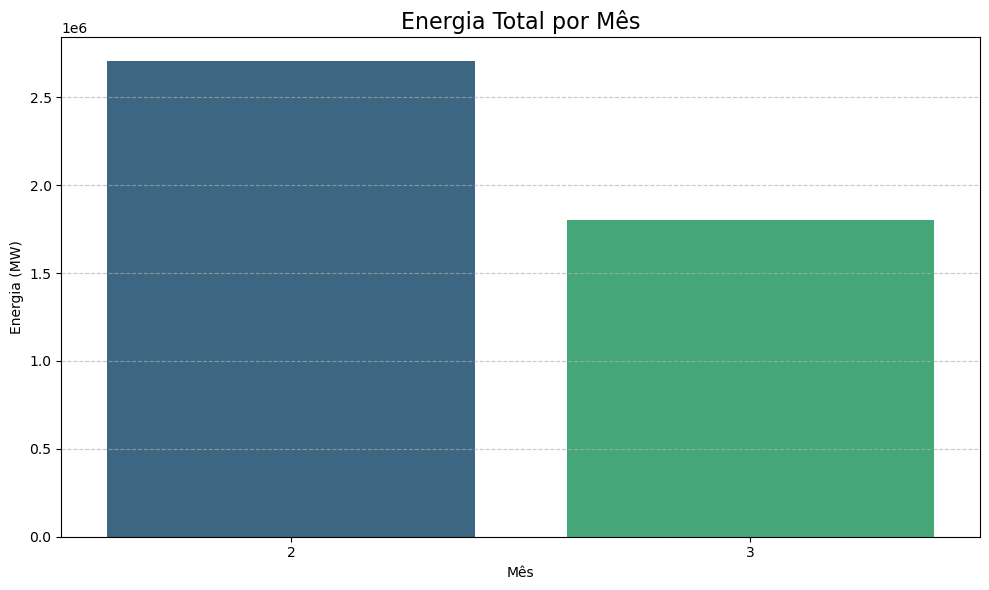

In [ ]:
# Gere dataframes e gráficos para análise

# Importando bibliotecas 
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupando por ano
dados_completos['ano'] = dados_completos['data'].dt.year
energia_por_ano = dados_completos.groupby('ano')['energia_MW'].sum().reset_index()
print("Energia por ano:")
print(energia_por_ano)

# Agrupamento por mês
dados_completos['mes'] = dados_completos['data'].dt.month
energia_por_mes = dados_completos.groupby('mes')['energia_MW'].sum().reset_index()
print("\nEnergia por mês:")
print(energia_por_mes)

# Agrupamento por estação do ano:
def estacao_do_ano(data):
    mes = data.month
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'
dados_completos['estacao'] = dados_completos['data'].apply(estacao_do_ano)
energia_por_estacao = dados_completos.groupby('estacao')['energia_MW'].sum().reset_index()
print("\nEnergia por estação do ano:")
print(energia_por_estacao)

# Agrupamento por submercado
energia_por_submercado = dados_completos.groupby('submercado')['energia_MW'].sum().reset_index()
print("\nEnergia por submercado:")
print(energia_por_submercado)

# Agrupamento por bacia hidrográfica
energia_por_bacia = dados_completos.groupby('bacia')['energia_MW'].sum().reset_index()
print("\nEnergia por bacia hidrográfica:")
print(energia_por_bacia.head())

# Gráfico de barras: Energia total por ano
plt.figure(figsize=(10, 6))
sns.barplot(data=energia_por_mes, x='mes', y='energia_MW', palette='viridis')
plt.title('Energia Total por Mês', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Energia (MW)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Comentário:** Explique o raciocínio adotado para os agrupamentos.

Os agrupamentos temporais mostram as tendências de longo prazo na energia (agrupamento por ano), revelam a sazonalidade (agrupamento por mês) e relaciona os dados com o clima (agrupamento por estação). Esses resultados ajudam a identificar mudanças nas condições hidrológicas e impactos de eventos mais extremos.

Com relação aos agrupamentos por postos, estes ajudam na performance individual de cada posto. Os agrupamentos por submercado/bacia apresental uma visão mais regional dos valores de energia.

## 5. Modelo de Regressão

In [ ]:
# Escolha duas variáveis e aplique uma regressão linear simples

# A variável independente escolhida é a 'Data'. A vaariável dependente escolhida é a vazão.

# Impportando bibliotecas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Selecionando um posto em específico. No caso, o posto 1 foi o escolhido
dados_posto = dados_completos[dados_completos['posto'] == 1]
dados_posto = dados_posto.dropna(subset=['data', 'vazao'])

# Criando e ajustando o modelo
X = dados_posto['data'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = dados_posto['vazao'].values.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X) # previsões

# Coeficientes do modelo
print("Coeficiente angular:", modelo.coef_[0][0])
print("Intercepto:", modelo.intercept_[0])

# Calculando R² do modelo
r2 = r2_score(y, y_pred)
print(f'R² do modelo: {r2:.4f}')

Coeficiente angular: -1.585635534213686
Intercepto: 1172391.4631817532
R² do modelo: 0.1573


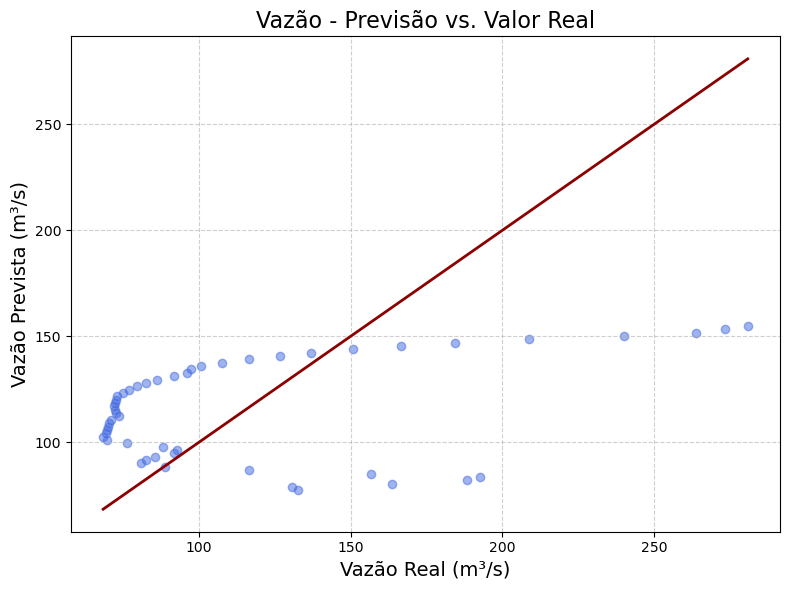

In [ ]:
# Avalie os resultados com métricas e gráficos

# Importando biblioteca
import matplotlib.pyplot as plt

# Gerando o gráfico de regressão linear de previsão vs. valor real de vazão
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'darkred', linewidth=2)  
plt.xlabel('Vazão Real (m³/s)', fontsize=14)
plt.ylabel('Vazão Prevista (m³/s)', fontsize=14)
plt.title('Vazão - Previsão vs. Valor Real', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Comentário:** Interprete os resultados da regressão.

O coeficiente angular em -1.58 indica que, para cada aumento de 1 unidade na variável independente, a vazão estimada diminui em média 1.59 m³/s. Ou seja, há uma tendência de queda da vazão com o tempo.

O intercepto em 1.17 representa a vazão estimada quando a variável independente é zero. Como a variável independente é a data, o valor zero representa uma data bem antiga (tipo o início da contagem de tempo).

O R² em 0.15 significa que apenas cerca de 15,7% da variação da vazão está sendo explicada pela variável independente. Isso indica que o modelo não está explicando muito bem a variação da vazão ao longo do tempo.

## ✅ Conclusão

Faça aqui qualquer consideração final que julgar relevante sobre sua análise ou o processo.

Na minha visão, o tratamento adequado dos dados é de extrema importância para a realização de uma análise exploratória eficiente e confiável. Ao aplicar processos de limpeza e verificação (como foi feito nesse processo), é assegurado que os dados analisados representem fielmente a realidade observada. Dessa forma, esse primeiro cuidado é essencial para garantir a qualidade das análises, permitindo uma interpretação precisa para tomada de decisões.